# Assignment 1
Reference

https://medium.com/analytics-vidhya/communities-and-crime-analysis-and-prediction-be6100ca6790

https://github.com/vbordalo/Communities-Crime/blob/master/Crime_v1.ipynb

https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

## 1.Preparation

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.4f'%x) #store 4 digits after the decimal

In [108]:
data = pd.read_csv('/Users/sami/Downloads/communities-mod.csv')
data.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.1900,0.3300,0.3400,0.4700,0.2900,0.3200,0.2000,1.0000,0.3700,0.7200,...,0.1200,0.4200,0.5000,0.5100,0.6400,0.1200,0.2600,0.2000,0.3200,0.2000
1,0.0000,0.1600,0.2600,0.5900,0.3500,0.2700,0.0200,1.0000,0.3100,0.7200,...,0.2100,0.5000,0.3400,0.6000,0.5200,0.0200,0.1200,0.4500,0.0000,0.6700
2,0.0000,0.4200,0.3900,0.4700,0.2800,0.3200,0.0000,0.0000,0.3000,0.5800,...,0.1400,0.4900,0.5400,0.6700,0.5600,0.0100,0.2100,0.0200,0.0000,0.4300
3,0.0400,0.7700,0.5100,0.5000,0.3400,0.2100,0.0600,1.0000,0.5800,0.8900,...,0.1900,0.3000,0.7300,0.6400,0.6500,0.0200,0.3900,0.2800,0.0000,0.1200
4,0.0100,0.5500,0.3800,0.3800,0.2300,0.3600,0.0200,0.9000,0.5000,0.7200,...,0.1100,0.7200,0.6400,0.6100,0.5300,0.0400,0.0900,0.0200,0.0000,0.0300


### There is no string data.

In [109]:
isinstance(data,str)

False

In [110]:
data.isnull().any()

population             False
householdsize          False
agePct12t21            False
agePct12t29            False
agePct16t24            False
                       ...  
LandArea               False
PopDens                False
PctUsePubTrans         False
LemasPctOfficDrugUn    False
ViolentCrimesPerPop    False
Length: 91, dtype: bool

In [111]:
data.describe()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,...,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000,1994.0000
mean,0.0576,0.4634,0.4242,0.4939,0.3363,0.4232,0.0641,0.6963,0.3611,0.5582,...,0.2156,0.6089,0.5351,0.6264,0.6515,0.0652,0.2329,0.1617,0.0941,0.2380
std,0.1269,0.1637,0.1552,0.1436,0.1665,0.1792,0.1283,0.4448,0.2094,0.1829,...,0.2311,0.2043,0.1814,0.2005,0.1982,0.1095,0.2031,0.2291,0.2403,0.2330
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0100,0.3500,0.3400,0.4100,0.2500,0.3000,0.0000,0.0000,0.2000,0.4400,...,0.0600,0.4700,0.4200,0.5200,0.5600,0.0200,0.1000,0.0200,0.0000,0.0700
50%,0.0200,0.4400,0.4000,0.4800,0.2900,0.4200,0.0300,1.0000,0.3200,0.5600,...,0.1300,0.6300,0.5400,0.6700,0.7000,0.0400,0.1700,0.0700,0.0000,0.1500
75%,0.0500,0.5400,0.4700,0.5400,0.3600,0.5300,0.0700,1.0000,0.4900,0.6900,...,0.2800,0.7775,0.6600,0.7700,0.7900,0.0700,0.2800,0.1900,0.0000,0.3300
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)


array([[<AxesSubplot:title={'center':'ViolentCrimesPerPop'}>]],
      dtype=object)

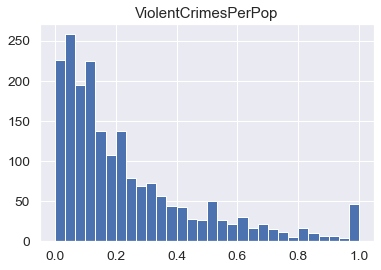

In [172]:

data.hist(column = ['ViolentCrimesPerPop'],bins = 30)


## 2.Correlations

In [113]:
corr = data.corr(method = 'pearson').round(4)
corr = corr.sort_values(by=['ViolentCrimesPerPop'])
corr['ViolentCrimesPerPop']

PctKids2Par           -0.7384
PctFam2Par            -0.7067
PctYoungKids2Par      -0.6661
PctTeen2Par           -0.6616
pctWInvInc            -0.5763
                        ...  
TotalPctDiv            0.5528
FemalePctDiv           0.5560
pctWPubAsst            0.5747
PctIlleg               0.7380
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, Length: 91, dtype: float64

### Correlation Matrix 

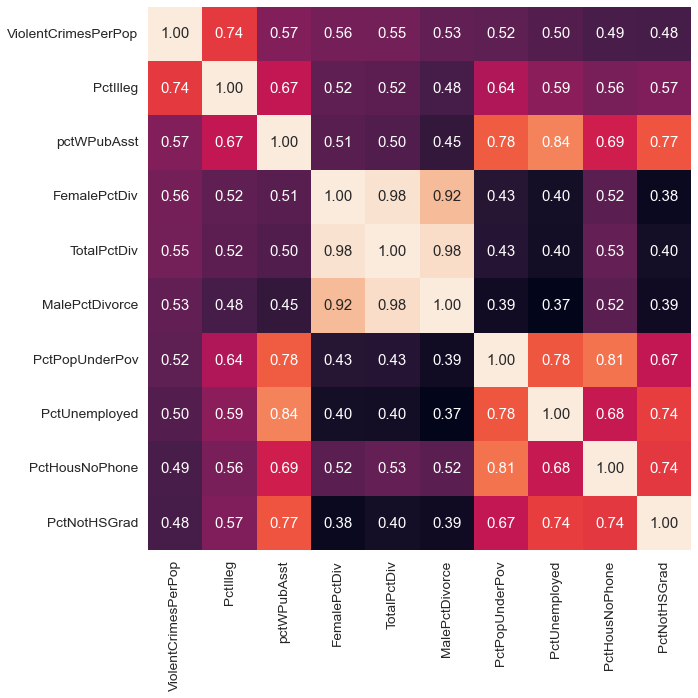

In [167]:

fig = plt.figure(figsize = (7,7))
n=10
data_corr=data.corr()
columns=data_corr.nlargest(n,'ViolentCrimesPerPop')['ViolentCrimesPerPop'].index
cm=np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=False,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=columns.values,
                 xticklabels=columns.values)
plt.show()


### We plot the correlation matrix for the top 10 top related features with ViolentCrimePerPop.

### From this We can surely say that :
Top 5 factors which are strongly correlated to crime rate than other variables are :
   PctIlleg: Percentage of kids born to never married
   pctWPubAsst: percentage of households with public assistance income in 1989 
   (FemalePctDiv,TotalPctDiv,MalePctDivorce): Male / Female Divorce percentage 
   PctPopUnderPov: Percentage of people under the poverty level
   PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed
 

## 3.Linear Multiple Regression
Now we will apply the weighted linear regression model to predict the crime rate with given data points.

The dataset contains many highly correlated variables with multicollinearity.And the higher the number of features, the more difficult it is to model them.

https://medium.com/analytics-vidhya/communities-and-crime-analysis-and-prediction-be6100ca6790

In [115]:
from __future__ import print_function
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable,default_txt_fmt)
np.random.seed(1024)

In [116]:
nsample=1994
w=np.ones(nsample)
w[nsample*6//10:]=3
w.shape

(1994,)

### For simplicity, we took only 7 features which are most important for predicting the crime rate to check the validity of our model.

### Now we can see all the statistics for all features :

In [117]:
y=data['ViolentCrimesPerPop']
X=data[['PctIlleg','pctWPubAsst','FemalePctDiv','PctPopUnderPov','PctUnemployed','PctHousNoPhone','PctNotHSGrad']]


In [118]:
mod_wls=sm.WLS(y,X,weights=1./(w ** 2))
res_wls=mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.790
Model:                             WLS   Adj. R-squared (uncentered):              0.790
Method:                  Least Squares   F-statistic:                              1070.
Date:                 Mon, 25 Jul 2022   Prob (F-statistic):                        0.00
Time:                         15:59:47   Log-Likelihood:                          434.75
No. Observations:                 1994   AIC:                                     -855.5
Df Residuals:                     1987   BIC:                                     -816.3
Df Model:                            7                                                  
Covariance Type:             nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### We can see here we are getting almost 0.790 as R2_value.

## 4.Principal Component Analysis (PCA)

The higher the number of features, the more difficult it is to model them, this is known as the curse of dimensionality.Let's apply dimensionality reduction utilizing PCA.

In [119]:
data1=data.drop(columns='ViolentCrimesPerPop')
data1 = data1.apply(lambda x: (x-x.mean())/x.std(), axis=0)
data1.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,1.0434,-0.8148,-0.5427,-0.1662,-0.2779,-0.5757,1.0598,0.6828,0.0424,0.8848,...,-0.2269,-0.4134,-0.9245,-0.1933,-0.5806,-0.0582,0.5004,0.1337,0.1673,0.9402
1,-0.4538,-1.8532,-1.0581,0.6696,0.0825,-0.8548,-0.3436,0.6828,-0.2442,0.8848,...,-0.2269,-0.0240,-0.5329,-1.0755,-0.1318,-0.6635,-0.4132,-0.5557,1.2587,-0.3913
2,-0.4538,-0.2651,-0.2205,-0.1662,-0.3379,-0.5757,-0.4996,-1.5653,-0.2919,0.1194,...,-0.2269,-0.3269,-0.5819,0.0273,0.2173,-0.4618,-0.5046,-0.1125,-0.6186,-0.3913
3,-0.1386,1.8728,0.5527,0.0427,0.0224,-1.1896,-0.0318,0.6828,1.0454,1.8142,...,-0.2269,-0.1105,-1.5117,1.0750,0.0677,-0.0077,-0.4132,0.7738,0.5165,-0.3913
4,-0.3750,0.5290,-0.2849,-0.7931,-0.6382,-0.3525,-0.3436,0.4580,0.6633,0.8848,...,-0.2269,-0.4567,0.5438,0.5787,-0.0819,-0.6131,-0.2305,-0.7034,-0.6186,-0.3913


In [139]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data1)
feature = pca.transform(data1)
#Eigenvalues and Eigenvectors
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(data1.columns))])

,0
PC1,22.6849
PC2,15.5517
PC3,8.9302
PC4,7.3323
PC5,5.5869
...,...
PC86,0.0018
PC87,0.0013
PC88,0.0012
PC89,0.0008


### Eigenvectors of PCA

In [140]:
pd.DataFrame(pca.components_, columns=data1.columns, index=["PC{}".format(x + 1) for x in range(len(data1.columns))])

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
PC1,0.0596,-0.0155,0.0612,0.0749,0.0645,0.0388,0.0526,-0.0525,-0.1899,-0.1200,...,0.0496,-0.0021,0.0347,-0.0484,0.0165,0.0150,0.0295,0.0385,-0.0169,0.0552
PC2,0.0946,0.1200,0.0412,0.0885,0.0585,-0.1204,0.0994,0.0845,0.0697,0.0995,...,0.0854,0.2180,-0.1347,-0.0775,-0.0626,-0.0781,0.0330,0.1424,0.1092,0.0651
PC3,0.1425,-0.2250,-0.0485,0.0280,0.0497,0.0677,0.1442,0.0683,-0.0078,-0.0314,...,0.1092,-0.0425,-0.0988,-0.1172,-0.1212,-0.1399,0.1003,0.0367,0.0852,0.1012
PC4,-0.1118,0.1097,0.2494,0.2537,0.2427,-0.2018,-0.1203,-0.1019,-0.0540,0.1486,...,-0.1012,-0.0911,-0.0334,-0.2392,-0.2505,-0.1629,-0.0479,-0.1188,-0.1391,-0.0706
PC5,0.2780,0.1168,0.0709,0.0399,0.0072,-0.1827,0.2740,0.0400,0.0293,0.1453,...,0.1770,-0.1238,0.0743,0.0085,0.0158,0.0250,0.2769,-0.1119,-0.0261,0.0877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC86,0.7077,0.0065,0.0049,0.0120,-0.0222,0.0041,-0.6960,0.0763,0.0076,-0.0036,...,0.0024,-0.0094,0.0007,0.0010,-0.0036,-0.0022,-0.0136,-0.0073,0.0019,0.0006
PC87,0.0128,0.0031,-0.0084,-0.0191,0.0296,-0.0128,-0.0112,-0.0016,0.0009,0.0020,...,-0.0021,-0.0314,-0.0025,0.0057,-0.0004,-0.0008,-0.0013,-0.0007,0.0017,0.0014
PC88,0.0236,-0.0172,0.0058,-0.0032,-0.0010,-0.0038,-0.0223,0.0026,0.0073,0.0000,...,0.0039,-0.0159,-0.0006,-0.0015,-0.0052,0.0016,0.0010,0.0025,0.0013,0.0014
PC89,0.0109,0.0053,0.0124,0.0107,-0.0210,0.0121,-0.0032,0.0009,-0.0224,-0.0012,...,-0.0013,-0.0043,0.0009,-0.0011,-0.0009,0.0002,-0.0006,-0.0050,0.0026,-0.0003


## This double-labeled chart displays the following.
## PctHousNoPhone,NumUnderPov and PctEmplProfServ variables have  large positive load on PCA1,medIncome and medFamInc variables have large negative load on PCA1. Thus, PCA1 is associated with community economic situation and household income

## PctRecImmig~ et al. variables have larger positive load on PCA 2 and PctSpeakEnglOnly variable has a larger negative load on PCA2. Thus, PCA2 is associated with community new immigrants and language richness.
Plotting the contribution of the observed variable in the first and second principal components gives an idea of what each component considers.


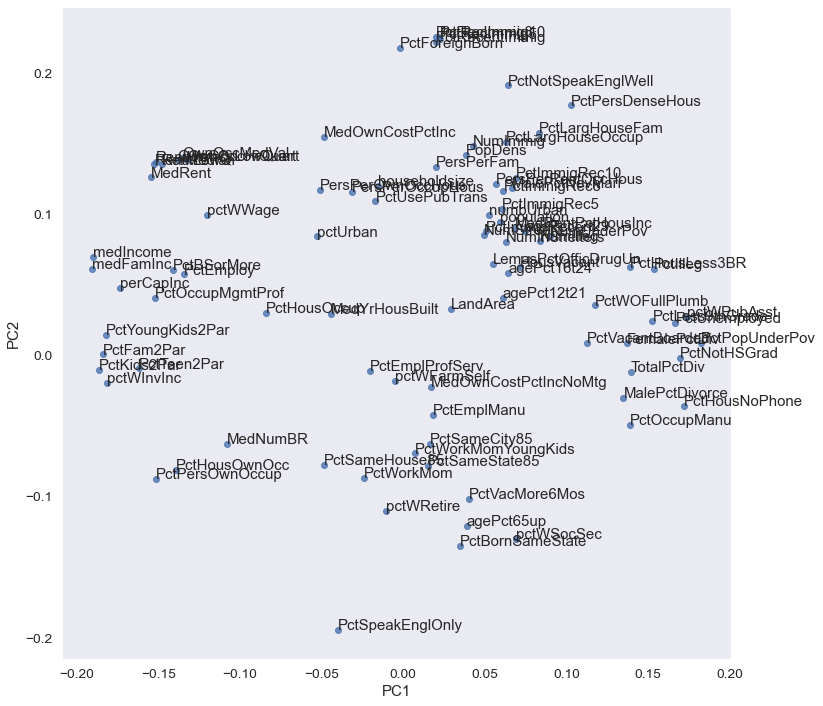

In [173]:

plt.figure(figsize=(12, 12))
for x, y, name in zip(pca.components_[0], pca.components_[1], data1.columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [142]:
from sklearn.decomposition import PCA

c = 25
pca = PCA(n_components = c)
pca.fit(data1)

PCA(n_components=25)

In [143]:
pca.explained_variance_ratio_

array([0.25205422, 0.17279654, 0.09922489, 0.08147009, 0.06207697,
       0.04609603, 0.0338768 , 0.02690011, 0.02152014, 0.01725611,
       0.01569191, 0.0147459 , 0.01448949, 0.00989593, 0.00953411,
       0.0080184 , 0.00708552, 0.00654247, 0.00619555, 0.00587355,
       0.00545366, 0.00526055, 0.00479706, 0.00434939, 0.00408923])

In [144]:
sum(pca.explained_variance_ratio_)


0.9352946304885017

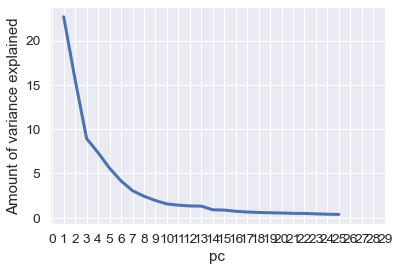

In [145]:
plt.plot(np.arange(1,(c+1)),pca.explained_variance_, linewidth=3)
plt.xlabel('pc')
plt.ylabel('Amount of variance explained'); plt.grid(True)
plt.xticks(np.arange(0, 30, 1))
plt.show()

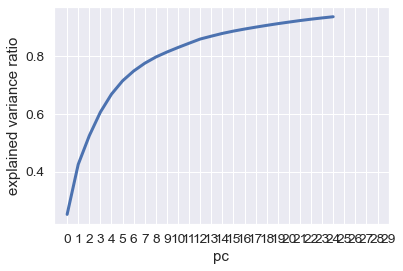

In [146]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=3)
plt.xlabel('pc')
plt.ylabel('explained variance ratio'); plt.grid(True)
plt.xticks(np.arange(0, 30, 1))
plt.show()

### Re-select the number of principal components =5
- Where the contribution rate decreases significantly
- Where the cumulative contribution ratio is between 70% and 80%

Plot with first and second principal components.
## Up to the second principal component (PC2), the samples are not sufficiently distinct.

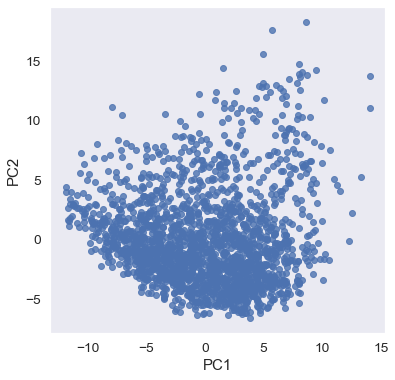

In [147]:

pca = PCA(n_components=5) 
pca.fit(data1)
feature = pca.transform(data1)#the dimension-reduced dataset

plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



In [148]:
pd.DataFrame(pca.components_).T


,0,1,2,3,4
0,0.0596,0.0946,0.1425,-0.1118,0.2780
1,-0.0155,0.1200,-0.2250,0.1097,0.1168
2,0.0612,0.0412,-0.0485,0.2494,0.0709
3,0.0749,0.0885,0.0280,0.2537,0.0399
4,0.0645,0.0585,0.0497,0.2427,0.0072
...,...,...,...,...,...
85,0.0150,-0.0781,-0.1399,-0.1629,0.0250
86,0.0295,0.0330,0.1003,-0.0479,0.2769
87,0.0385,0.1424,0.0367,-0.1188,-0.1119
88,-0.0169,0.1092,0.0852,-0.1391,-0.0261


 ### It can be interpreted as: PCA1 = 0.0596*X1 -0.0155*X2 + 0.0612*X3 + ```+0.0645X90
 So,an important thing to realize here is that the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.
 
 
 
 
 
 

# Assignment 2
Use the same Abalone Data Set（abalone.data）as the midterm assignment.
http://archive.ics.uci.edu/ml/datasets/Abalone

In advance, manually modify the .data file to a .csvfile.

Reference

https://github.com/scikit-learn/scikit-learn

## In this part I will apply the scikit-learn  in details:

   preprocess the data to make them suitable for scikit-learn
   
   fit a Decision Tree to the data
   
   compare the predicted and true values
   
   plot the learning curve
   
   use cross validation to tune model parameters

## 1.Preparation

In [149]:
abalone = pd.read_csv('/Users/sami/Downloads/abalone.csv',
                     names=["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]).reset_index() 
abalone.head()                             


,index,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,M,0.4550,0.3650,0.0950,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.3500,0.2650,0.0900,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.5300,0.4200,0.1350,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.4400,0.3650,0.1250,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.3300,0.2550,0.0800,0.2050,0.0895,0.0395,0.0550,7


Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so we create a binary/boolean feature for each of the 3 options:

In [150]:

for label in "MFI":
    abalone[label] = abalone["sex"] == label
del abalone["sex"]

In [151]:
abalone.head()

,index,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,M,F,I
0,0,0.4550,0.3650,0.0950,0.5140,0.2245,0.1010,0.1500,15,True,False,False
1,1,0.3500,0.2650,0.0900,0.2255,0.0995,0.0485,0.0700,7,True,False,False
2,2,0.5300,0.4200,0.1350,0.6770,0.2565,0.1415,0.2100,9,False,True,False
3,3,0.4400,0.3650,0.1250,0.5160,0.2155,0.1140,0.1550,10,True,False,False
4,4,0.3300,0.2550,0.0800,0.2050,0.0895,0.0395,0.0550,7,False,False,True


Data in sklearn are structured as:

a 2D numpy array (n_samples, n_features), where each column is a feature (e.g. sex and physical dimensions) for each sample, e.g. each measured Abalone.
a 1D numpy array (n_samples) of the value we aim to predict, e.g. the number of rings, standard variable name y

In [152]:
y = abalone.rings.values

In [153]:
abalone=abalone.drop(columns='rings')
X = abalone.values.astype(float)

## Split data in Training and Test sets
 We can split the data into training and validation sets and use Machine Learning to create an estimator that can learn from the training set and then check its performance on the test set.

In [154]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2)#test_size=0.2 means that we use 20% of data for test set) 

See the length of the sets

In [155]:

len(train_X), len(train_y), len(test_X), len(test_y)

(3341, 3341, 836, 836)

## 2.Fit a Decision Tree to the data


In [156]:

from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(train_X, train_y)
# apply the model to the test and training data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

We can visualize the results with a scatter-plot of the true number of rings against the predicted number of rings:

Reference

https://github.com/scikit-learn/scikit-learn

In [157]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

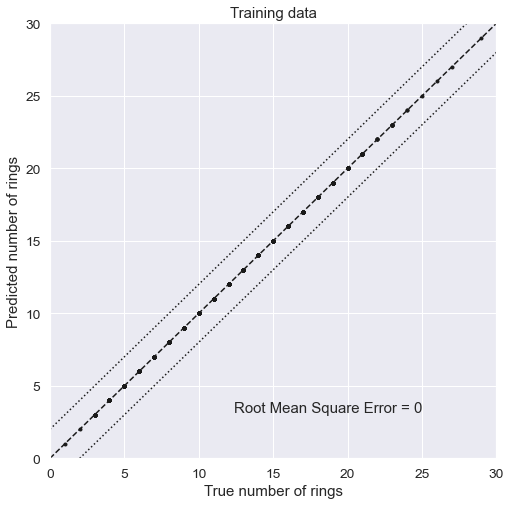

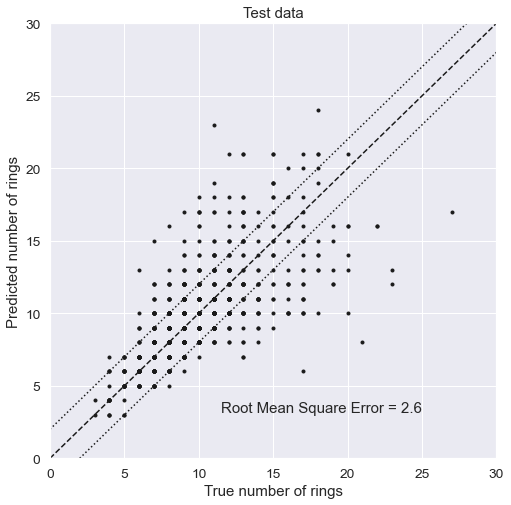

In [158]:
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
scatter_y(test_y, predicted_test_y)
plt.title("Test data");

To prevent the Decision Tree overfitting the training set, we specify a maximum depth of the decision tree of  10 , so that the estimator does not "specialize" too much on the training data.

In [159]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(train_X, train_y)
# apply the model to the test and train data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

We can see that the error in test sets is higher than in training sets. This is a good thing because when the machine model makes predictions based on the training set, it has already learned the correct answer. At the same time, the error in the test sets is higher because the model does not know the answers to the test data. 

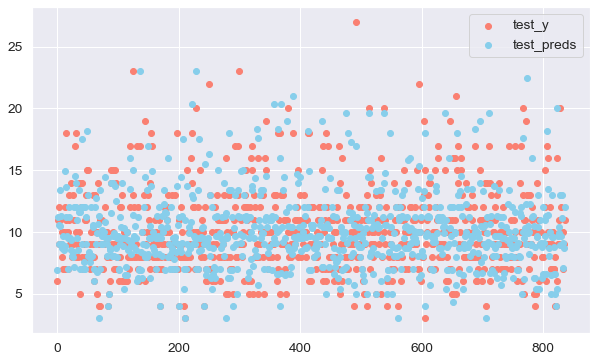

In [160]:
# Predict the labels on test data
test_preds = model.predict(test_X) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(test_y.shape[0]), test_y, color="salmon", label="test_y")
plt.scatter(range(test_y.shape[0]), test_preds, color="skyblue", label="test_preds")
plt.legend();

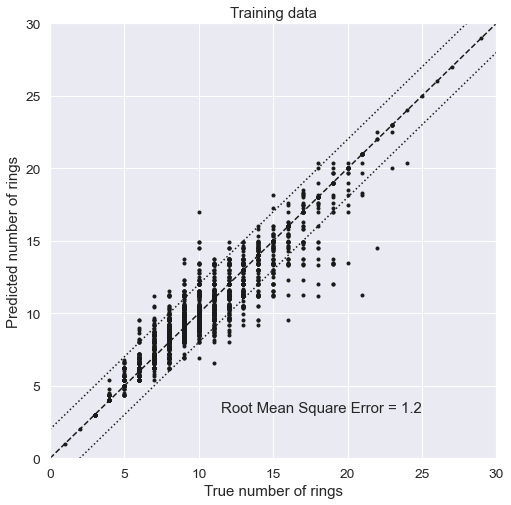

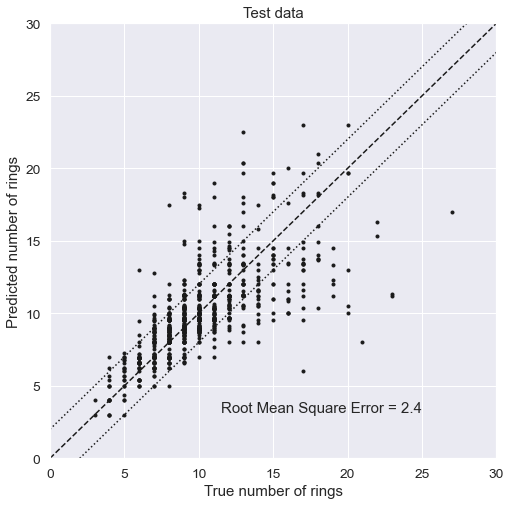

In [161]:
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(test_y, predicted_test_y)
plt.title("Test data");

## 3.Plot learning curves

In [162]:
data_percentage_array = np.linspace(10, 100, 10)

In [163]:
train_error = []
test_error = []
for data_percentage in data_percentage_array:
    model = DecisionTreeRegressor(max_depth=10)
    number_of_samples = int(data_percentage / 100. * len(train_y))
    model.fit(train_X[:number_of_samples,:], train_y[:number_of_samples])

    predicted_train_y = model.predict(train_X)
    predicted_test_y = model.predict(test_X)

    train_error.append((predicted_train_y - train_y).std())
    test_error.append((predicted_test_y - test_y).std())

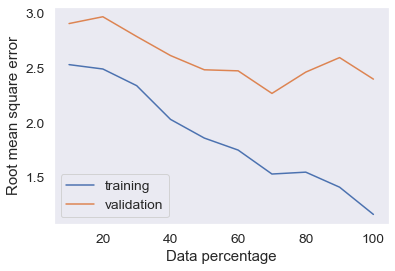

In [164]:
plt.plot(data_percentage_array, train_error, label='training')
plt.plot(data_percentage_array, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Root mean square error');

Inspecting the learning curve, we see that the training error decreases as the DecisionTree fits better the data, but the validation error shows a significant gap compared to training error. That typically means the model is not fitting the data well.

## 4.Fit a Random Forest estimator to the data
In this case it is useful to test a more sophisticated model, for example Random Forests, i.e. a method that trains several Decision Trees and averages them.

sklearn has a very consistent interface, for any estimator, call fit for training then predict to estimate.

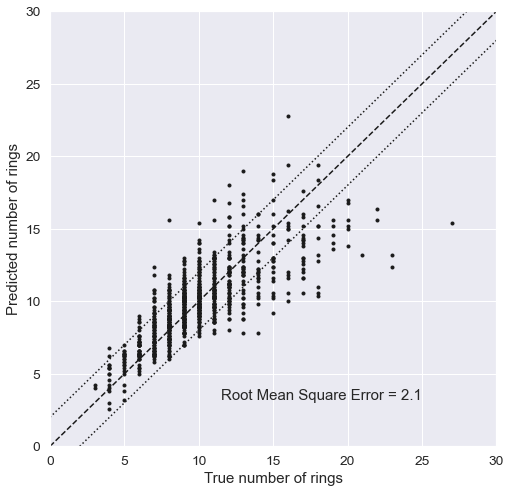

In [165]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_random_forest = scatter_y(test_y, predicted_test_y)

In [166]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))

Root Mean Square error decreases from 2.4 to 2.1.
